In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file
data = pd.read_csv("AMMA_unavagam.csv")

In [4]:
data.head()

,Zone,Div,Address,latitude,longitude
0,1,1,"KATHIVAKKAM HIGH ROAD, THAZHANKUPPAM, CHENNAI...",13.2275,80.3258
1,1,1,"J.J NAGAR KATHIVAKKAM HIGH ROAD KATHIVAKKAM, ...",13.2247,80.3208
2,1,2,"K.H.ROAD , CORPORATION COMPLEX, KATHIVAKKAM ,...",13.2162,80.3206
3,1,2,"GRAMACH SALAI, ENNORE, CHENNAI-600 057",13.2171,80.3193
4,1,3,"COC COMMUNITY HALL PREMISES, ANNAI SIVAKAMI N...",13.1970,80.3151


In [5]:
data.size

2035

In [6]:
# Extract latitude and longitude columns
latitude = data["latitude"]
longitude = data["longitude"]

In [7]:
latitude.shape
longitude.shape

(407,)

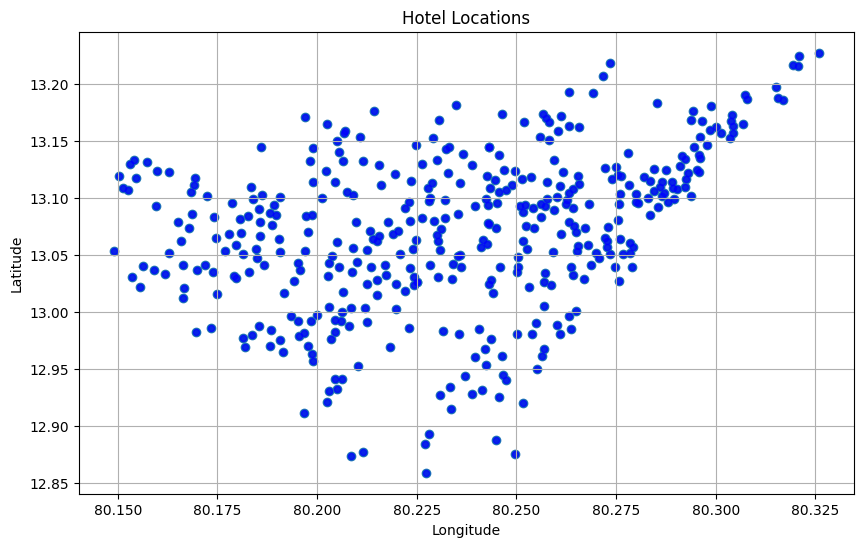

In [8]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(longitude, latitude)

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hotel Locations")

# Optional: Add markers for hotels (adjust marker size and color)
plt.scatter(longitude, latitude, s=20, c='blue', alpha=0.7)

plt.grid(True)
plt.show()


In [9]:
import geopandas as gpd
from shapely.geometry import Point

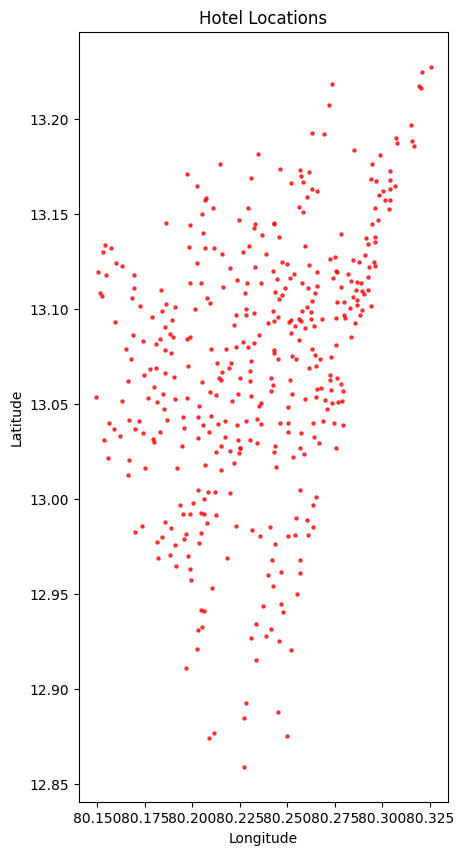

In [13]:
# Check if the columns exist
if 'latitude' in data.columns and 'longitude' in data.columns:
    # Convert latitude and longitude to a list of shapely Point objects
    geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry)

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7)

    # Set plot title and labels
    ax.set_title('Hotel Locations')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Save the plot as a static image
    plt.savefig('hotel_locations.png', dpi=300)

    # Show the plot
    plt.show()
else:
    print("The CSV file does not contain 'latitude' and 'longitude' columns.")

In [15]:
! pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 71.4 MB/s eta 0:00:00


In [16]:
import contextily as ctx

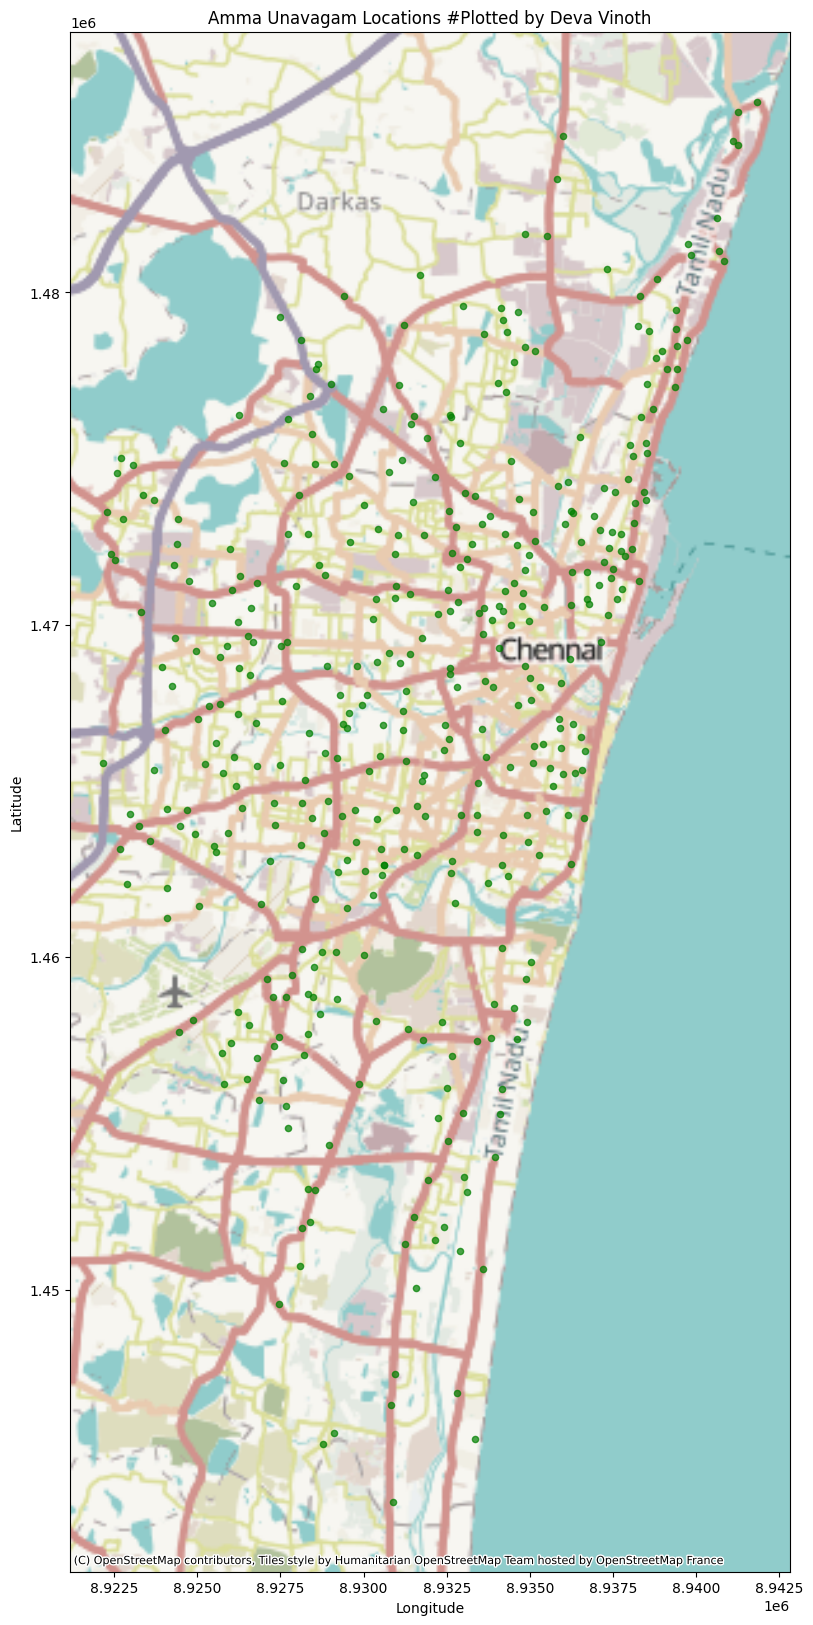

In [25]:
# Check if the columns exist
if 'latitude' in data.columns and 'longitude' in data.columns:
    # Convert latitude and longitude to a list of shapely Point objects
    geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry)

    # Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
    gdf.set_crs(epsg=4326, inplace=True)

    # Convert the CRS to Web Mercator (EPSG:3857) which is required by contextily
    gdf = gdf.to_crs(epsg=3857)

    # Create a plot
    fig, ax = plt.subplots(figsize=(20, 20))

    # Plot the data points
    gdf.plot(ax=ax, marker='o', color='green', markersize=20, alpha=0.7)

    # Add basemap
    ctx.add_basemap(ax)

    # Set plot title and labels
    ax.set_title('Amma Unavagam Locations #Plotted by Deva Vinoth')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Save the plot as a static image
    plt.savefig('hotel_locations_map.png', dpi=300)

    # Show the plot
    plt.show()
else:
    print("The CSV file does not contain 'latitude' and 'longitude' columns.")